Text(0.5, 0.98, 'Explicit Lotka-Volterra Model')

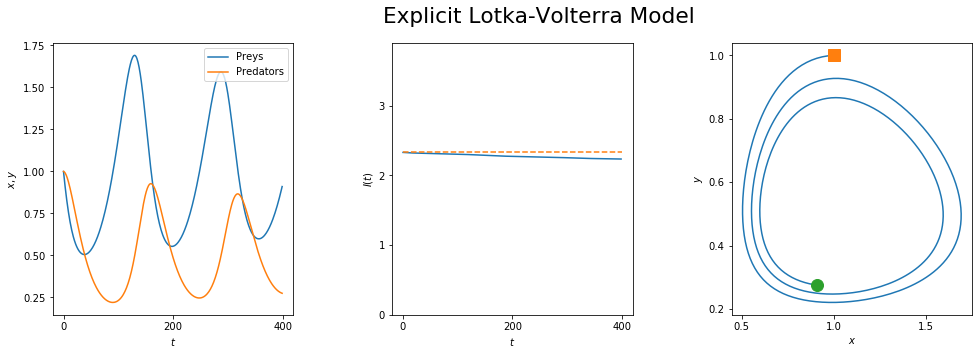

In [3]:
# Explicit Lotka-Volterra Model
import numpy as np 
from matplotlib import pyplot as plt

N = 400             # Simulation length

x0 = 1
y0 = 1
alpha = 0.67
beta = 1.33
gamma = 1
delta = 1
dt = 0.05

x = np.zeros(N)
y = np.zeros(N)
x[0] = x0
y[0] = y0

for t in range(N-1):
    a_x = (1-dt*alpha)*dt*delta
    b_x = -((1-dt*alpha)*(1+dt*gamma)+dt*(delta*x[t]+beta*y[t]))
    c_x = (1+dt*gamma)*x[t]
    sol = [(-b_x+np.sqrt(b_x**2-4*a_x*c_x))/(2*a_x),(-b_x-np.sqrt(b_x**2-4*a_x*c_x))/(2*a_x)]
    newx = sol[np.argmin(abs(sol-x[t]))]

    a_y = (1+dt*gamma)*dt*beta
    b_y = ((1-dt*alpha)*(1+dt*gamma)-dt*(delta*x[t]+beta*y[t]))
    c_y = -(1-dt*alpha)*y[t]
    sol = [(-b_y+np.sqrt(b_y**2-4*a_y*c_y))/(2*a_y),(-b_y-np.sqrt(b_y**2-4*a_y*c_y))/(2*a_y)]
    newy = sol[np.argmin(abs(sol-y[t]))]

    x[t+1] = x[t] + newx*(alpha-beta*newy)*dt
    y[t+1] = y[t] + newy*(delta*newx-gamma)*dt


fig = plt.figure(figsize=(18,5))
gs = fig.add_gridspec(3,12)

plt.subplot(gs[:,0:3])
plt.plot(x)
plt.plot(y)
plt.legend(['Preys','Predators'])
plt.ylabel('$x,y$')
plt.xlabel('$t$')


plt.subplot(gs[:,4:7])
I = delta*x-gamma*np.log(x) + beta*y - alpha*np.log(y)
plt.plot(I)
plt.plot([0,N], I[0]*np.ones(2), '--')
plt.ylabel('$I(t)$')
plt.xlabel('$t$')
plt.ylim([0,3.9])

plt.subplot(gs[:,8:11])
plt.plot(x,y)
plt.plot(x[0],y[0],'s', markersize=12)
plt.plot(x[-1],y[-1],'o', markersize=12)
plt.ylabel('$y$')
plt.xlabel('$x$')

plt.rcParams.update({'font.size': 18})
plt.suptitle('Implicit Lotka-Volterra Model')
